In [95]:
import numpy as np
import pandas as pd
import math
import random
from arbres import *
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
training_set = LabeledSet(2)

for i in range(0, 3):
    training_set.addExample([random.randint(0,2),random.randint(0,10)],1)
for i in range(0, 3):
    training_set.addExample([random.randint(3, 5), random.randint(0, 10)], 2)
for i in range(0, 4):
    training_set.addExample([random.randint(6, 10), random.randint(0,10)], 3)

In [20]:
sorted(training_set.x[:,0].tolist())

[0, 0, 1, 4, 4, 5, 7, 8, 8, 10]

In [10]:
training_set.x

array([[ 1,  0],
       [ 0,  2],
       [ 0,  2],
       [ 5,  2],
       [ 4,  5],
       [ 4,  8],
       [ 8,  9],
       [ 8,  6],
       [10,  0],
       [ 7, 10]])

In [49]:
def dominant_sets_attribute(a_j, labeled_set):    
    dominant_sets = dict()
    for i in range(0, labeled_set.size()):
        dominant_sets[i] = set()
        for k in range(0, labeled_set.size()):
            if labeled_set.getX(k)[a_j] >= labeled_set.getX(i)[a_j]:
                dominant_sets[i].add(k)
                
    return dominant_sets

def dominant_sets_label(labeled_set):
    dominant_sets = dict()
    for i in range(0, labeled_set.size()):
        dominant_sets[i] = set()
        for k in range(0, labeled_set.size()):
            if labeled_set.getY(k) >= labeled_set.getY(i):
                dominant_sets[i].add(k)
                
    return dominant_sets
    
print(dominant_sets_attribute(0, training_set))
print(dominant_sets_attribute(1, training_set))
print(dominant_sets_label(training_set))

{0: {0, 3, 4, 5, 6, 7, 8, 9}, 1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 2: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 3: {3, 6, 7, 8, 9}, 4: {3, 4, 5, 6, 7, 8, 9}, 5: {3, 4, 5, 6, 7, 8, 9}, 6: {8, 6, 7}, 7: {8, 6, 7}, 8: {8}, 9: {8, 9, 6, 7}}
{0: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 1: {1, 2, 3, 4, 5, 6, 7, 9}, 2: {1, 2, 3, 4, 5, 6, 7, 9}, 3: {1, 2, 3, 4, 5, 6, 7, 9}, 4: {4, 5, 6, 7, 9}, 5: {9, 5, 6}, 6: {9, 6}, 7: {9, 5, 6, 7}, 8: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 9: {9}}
{0: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 1: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 2: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, 3: {3, 4, 5, 6, 7, 8, 9}, 4: {3, 4, 5, 6, 7, 8, 9}, 5: {3, 4, 5, 6, 7, 8, 9}, 6: {8, 9, 6, 7}, 7: {8, 9, 6, 7}, 8: {8, 9, 6, 7}, 9: {8, 9, 6, 7}}


In [63]:
def dsr(w_i, a_j, labeled_set):
    dominant_set_attr = dominant_sets_attribute(a_j, labeled_set)[w_i]
    dominant_set_label = dominant_sets_label(labeled_set)[w_i]
    intersection = dominant_set_attr.intersection(dominant_set_label)
    
    return len(intersection) * 1.0 / len(dominant_set_attr) 

In [53]:
for i in range(0, 10):
    print(dsr(i, 0, training_set))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [58]:
dsr(3, 1, training_set)

{3, 4, 5, 6, 7, 8, 9}
{3, 4, 5, 6, 7, 9}
{1, 2, 3, 4, 5, 6, 7, 9}


0.75

In [54]:
for i in range(0, 10):
    print(dsr(i, 1, training_set))

1.0
1.0
1.0
0.75
1.0
1.0
1.0
0.75
0.4
1.0


In [132]:
def rdm(h, g, f, a_j, labeled_set):
    g_f = []
    
    for i in range(0, labeled_set.size()):         
        g_f.append(g(f(i, a_j, labeled_set)))
        
    return reduce(h, g_f)

In [133]:
# rsdm
print(rdm(lambda x, y:(x+y), lambda x:(1.0/training_set.size())*-log(x,2), dsr, 1, training_set))
# rgdm 
print(rdm(lambda x, y:(x+y), lambda x:(1.0/training_set.size())*(1-x), dsr, 1, training_set))

0.215200309344505
0.11


In [75]:
list(set([item for sublist in training_set.y.tolist() for item in sublist]))

[1, 2, 3]

In [87]:
def plot2DSet(labeled_set):
    """ LabeledSet -> NoneType
        Hypothèse: set est de dimension 2
        affiche une représentation graphique du LabeledSet
        remarque: l'ordre des labels dans set peut être quelconque
    """
    labels = list(set([item for sublist in labeled_set.y.tolist() for item in sublist]))
    markers = ['o', 'x', '*', 'v']
    S = []
    for label in labels:
        S.append(labeled_set.x[np.where(labeled_set.y == label),:][0])
    for i in range(len(labels)):
        plt.scatter(S[i][:,0],S[i][:,1],marker='x')

[array([[1, 0],
       [0, 2],
       [0, 2]]), array([[5, 2],
       [4, 5],
       [4, 8]]), array([[ 8,  9],
       [ 8,  6],
       [10,  0],
       [ 7, 10]])]


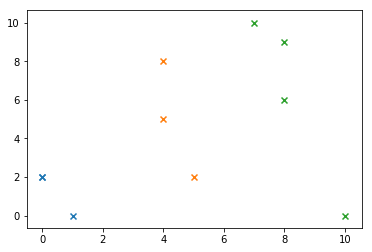

In [88]:
plot2DSet(training_set)

In [ ]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz as gv
import numbers

########## LABELEDSET ##########

class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self,vector,label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x, vector))
            self.y = np.vstack((self.y, label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
    
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
        
    
    #Renvoie la valeur de y_i
    def getY(self, i):
        return(self.y[i])
    

def plot2DSet(set):
    """ LabeledSet -> NoneType
        Hypothèse: set est de dimension 2
        affiche une représentation graphique du LabeledSet
        remarque: l'ordre des labels dans set peut être quelconque
    """
    S_pos = set.x[np.where(set.y == 1),:][0]      # tous les exemples de label +1
    S_neg = set.x[np.where(set.y == -1),:][0]     # tous les exemples de label -1
    plt.scatter(S_pos[:,0],S_pos[:,1],marker='o')
    plt.scatter(S_neg[:,0],S_neg[:,1],marker='x')
    
##################################

########## CLASSIFIEURS ##########

class Classifier:
    def __init__(self,input_dimension):
        """ Constructeur """
        raise NotImplementedError("Please Implement this method")
    
    
    # Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        raise NotImplementedError("Please Implement this method")

    
    # Permet d'entrainer le modele sur un ensemble de données étiquetés
    def train(self,labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    # Permet de calculer le taux de bonne classification
    def accuracy(self,set):
        nb_ok=0
        for i in range(set.size()):
            score = self.predict(set.getX(i))
            if (score*set.getY(i)>0):
                nb_ok = nb_ok+1
        acc = nb_ok/(set.size() * 1.0)
        return acc    
    
def plot_frontiere(set,classifier,step=10):
    """ LabeledSet * Classifier * int -> NoneType
        Remarque: le 3e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=set.x.max(0)
    mmin=set.x.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000],linewidth=2)

######################################################    
    
########### Entropie et gain d'information ###########
    
def classe_majoritaire(labeledSet, labels):
    classes_sizes = []
    #print(labeledSet.y.tolist())
    for label in labels:
        classes_sizes.append(len(labeledSet.x[np.where(labeledSet.y == label),:][0]))
    
    #print(classes_sizes)
    return labels[np.argmax(np.array(classes_sizes))]
    
    
def shannon(P):
    Hs = 0
    k = len(P)
    for p_i in P:
        tmp = 0
        if p_i != 0:
            tmp = p_i * log(p_i, k)
        Hs += tmp
    
    #print(P, -Hs)
    return -Hs

def entropie(labeledSet, labels):
    P = []
    # récupérer la distribution des classes
    for label in labels:
        P.append(len(labeledSet.x[np.where(labeledSet.y == label),0:labeledSet.getInputDimension()][0]) / (1.0 * labeledSet.size()))
    
    # calcul de l'entropie de shannon
    return shannon(P)

########### Discrétisation des attributs numériques ###########

def discretise(LSet, col, labels):
    """ LabelledSet * int -> tuple[float, float]
        col est le numéro de colonne sur X à discrétiser
        rend la valeur de coupure qui minimise l'entropie ainsi que son entropie.
    """
    # initialisation:
    min_entropie = 1.1  # on met à une valeur max car on veut minimiser
    min_seuil = 0.0     
    # trie des valeurs:
    ind= np.argsort(LSet.x,axis=0)
    
    # calcul des distributions des classes pour E1 et E2:
    
    inf_labels = [0 for i in range(len(labels))]
    sup_labels = [0 for i in range(len(labels))]
         
    # remarque: au départ on considère que E1 est vide et donc E2 correspond à E. 
    # Ainsi inf_plus et inf_moins valent 0. Il reste à calculer sup_plus et sup_moins 
    # dans E.
    for j in range(0,LSet.size()):
        l = LSet.getY(j)[0]
        i = labels.index(l)
        sup_labels[i] += 1
        
    nb_total = 0
    for v in sup_labels:
        nb_total += v
    # nombre d'exemples total dans E
    
    # parcours pour trouver le meilleur seuil:
    for i in range(len(LSet.x)-1):
        v_ind_i = ind[i]   # vecteur d'indices (ind_x1, ind_x2, ...)
        courant = LSet.getX(v_ind_i[col])[col] # récupérer la valeur de l'attribut col  correspondant à l'indice
        lookahead = LSet.getX(ind[i+1][col])[col] # la valeur qui suit
        val_seuil = (courant + lookahead) / 2.0; # le seuil
        # M-A-J de la distrib. des classes:
        # pour réduire les traitements: on retire un exemple de E2 et on le place
        # dans E1, c'est ainsi que l'on déplace donc le seuil de coupure.
        l = LSet.getY(ind[i][col])[0]# label
        
        indice = labels.index(l) # indice dans la liste de labels
        
        inf_labels[indice] += 1
        sup_labels[indice] -= 1
        
        
        # calcul de la distribution des classes de chaque côté du seuil:
        nb_inf = 0
        for v in inf_labels:
            nb_inf += v
        nb_inf *= 1.0
        
        nb_sup = 0
        for v in sup_labels:
            nb_sup += v
        nb_sup *= 1.0
        
        P_inf = []
        for v in inf_labels:
            P_inf.append(v/nb_inf)
        val_entropie_inf = shannon(P_inf)
        #print("entropie inf: ", val_entropie_inf)
        
        P_sup = []
        for v in sup_labels:
            P_sup.append(v/nb_sup)
        val_entropie_sup = shannon(P_sup)
        #print("entropie sup : ", val_entropie_sup)
        val_entropie = (nb_inf / nb_total) * val_entropie_inf + (nb_sup / nb_total) * val_entropie_sup
        #print("entropie : ", val_entropie)
        # si cette coupure minimise l'entropie, on mémorise ce seuil et son entropie:
        if (min_entropie > val_entropie):
            min_entropie = val_entropie
            min_seuil = val_seuil
    #print("min entropie : ", min_entropie)
    return (min_seuil, min_entropie)

def divise(Lset, att, seuil):
    E1 = LabeledSet(Lset.input_dimension)
    E2 = LabeledSet(Lset.input_dimension)
    
    ind= np.argsort(Lset.x,axis=0) # trie les valeurs => ind = tableau des indices
    lookahead = -1
    
    # Séparation des données selon le seuil
    for i in range(Lset.size()):
        if Lset.getX(i)[att] <= seuil:
            E1.addExample(Lset.getX(i), Lset.getY(i))
        else:
            E2.addExample(Lset.getX(i), Lset.getY(i))
    
    return E1, E2

#################################################

########### Représentation d'un arbre ###########

class ArbreBinaire:
    def __init__(self):
        self.attribut = None   # numéro de l'attribut
        self.seuil = None
        self.inferieur = None # ArbreBinaire Gauche (valeurs <= au seuil)
        self.superieur = None # ArbreBinaire Gauche (valeurs > au seuil)
        self.classe = None # Classe si c'est une feuille
        
    def est_feuille(self):
        """ rend True si l'arbre est une feuille """
        return self.seuil == None
    
    def ajoute_fils(self,ABinf,ABsup,att,seuil):
        """ ABinf, ABsup: 2 arbres binaires
            att: numéro d'attribut
            seuil: valeur de seuil
        """
        self.attribut = att
        self.seuil = seuil
        self.inferieur = ABinf
        self.superieur = ABsup
    
    def ajoute_feuille(self,classe):
        """ classe
        """
        self.classe = classe
        
    def classifie(self,exemple):
        """ exemple : numpy.array
            rend la classe de l'exemple
        """
        if self.est_feuille():
            return self.classe
        if exemple[self.attribut] <= self.seuil:
            return self.inferieur.classifie(exemple)
        return self.superieur.classifie(exemple)
    
    def to_graph(self, g, prefixe='A'):
        """ construit une représentation de l'arbre pour pouvoir
            l'afficher
        """
        if self.est_feuille():
            g.node(prefixe,str(self.classe),shape='box')
        else:
            g.node(prefixe, str(self.attribut))
            self.inferieur.to_graph(g,prefixe+"g")
            self.superieur.to_graph(g,prefixe+"d")
            g.edge(prefixe,prefixe+"g", '<='+ str(self.seuil))
            g.edge(prefixe,prefixe+"d", '>'+ str(self.seuil))
        
        return g 

#################################################################### 

########### Arbre de décision avec attributs catégoriels ###########

def divise_categoriel(Lset, att, categories):
    nb_cat = len(categories)
    E = [LabeledSet(Lset.getInputDimension()) for k in range(nb_cat)]

    
    n = Lset.size()             

    # Séparation des données selon l'attribut catégoriel
    for i in range(n):
        k = categories.index(Lset.getX(i)[att]) 
        E[k].addExample(Lset.getX(i), Lset.getY(i))         

    return E

def entropie_categorielle(LSet, col, categories, labels):
    distribution = [list() for i in range(len(labels))]
    
    #print("categories : ", categories)
    #print("labels : ", labels)
    
    for c in categories:
        nb_label_attr = []
        n = 0
        for i in range(len(labels)):
            l = labels[i]
            label_array = LSet.x[(np.where(LSet.y == l)), 0:LSet.getInputDimension()][0] 
            label_attr = label_array[np.where(label_array[:,col] == c)]
            nb_label_attr.append(len(label_attr))
            n += len(label_attr)
        for i in range(len(labels)):
            distribution[i].append(nb_label_attr[i] / (1.0 * n))
    
    #print(distribution)
    min_entropie = 1.1
    for i in range(len(categories)):
        P = []
        for j in range(len(labels)):
            P.append(distribution[j][i])
        #print(P)
        entro = shannon(P)
        if min_entropie > entro:
            min_entropie = entro
    return min_entropie

class ArbreCategoriel:
    def __init__(self):
        self.attribut = None   # numéro de l'attribut
        
        # arbre générique : attribut catégoriel
        self.fils = None

        self.classe = None # Classe si c'est une feuille: -1 ou +1
        
    def est_feuille(self):
        """ rend True si l'arbre est une feuille """
        return self.attribut == None
    
    
    def ajoute_fils(self,fils,att):
        """ fils: dictionnaire clé=catégorie, valeur=arbre
            att: numéro d'attribut
        """
        self.attribut = att
        self.fils = fils
    
    def ajoute_feuille(self,classe):
        """ classe
        """
        self.classe = classe
        
    def classifie(self,exemple):
        """ exemple : numpy.array
            rend la classe de l'exemple
        """
        if self.est_feuille():
            return self.classe
        else:
            for c,f in self.fils.items():
                if c == exemple[self.attribut]:
                    return f.classifie(exemple)
                
            
    def to_graph(self, g, prefixe='A'):
        """ construit une représentation de l'arbre pour pouvoir
            l'afficher
        """
        if self.est_feuille():
            g.node(prefixe,str(self.classe),shape='box')
        else:
            g.node(prefixe, str(self.attribut))
            
            for c, f in self.fils.items():
                f.to_graph(g,prefixe+c)
                g.edge(prefixe,prefixe+c, c)
        
        return g 

def construit_AD(Lset, epsilon, labels, measure, dsr_measure):
    if measure == "rsdm":
        entro = rsdm(dsr_measure, Lset)
    entro = entropie(Lset, labels) 
    d = Lset.getInputDimension()

    if entro <= epsilon:
        feuille = ArbreBinaire()
        feuille.ajoute_feuille(classe_majoritaire(Lset, labels))
        return feuille
    else:
        min_entropie = 1.1
        seuil = 0
        attribut = 0
        categories = []
        for attr in range(d):
            if isinstance(Lset.getX(0)[attr], numbers.Real): # attribut numérique
                s, entro = discretise(Lset, attr, labels)
                if min_entropie > entro:
                    min_entropie = entro
                    seuil = s
                    attribut = attr
            else: # attribut catégoriel
                # compter le nombre de catégories différentes
                n = Lset.size()
                cat = [] 
                distribution = [] # distribution des classes
                
                for i in range(n):
                    c = Lset.getX(i)[attr]
                    if c not in cat:
                        cat.append(c)
                                        
                    
                # calcul de l'entropie engendrée par ces catégories
                entro = entropie_categorielle(Lset, attr, cat, labels)

                # garder en mémoire l'attribut et les catégories
                if min_entropie > entro:
                    attribut = attr
                    categories = cat
                    
        if isinstance(Lset.getX(0)[attribut], numbers.Real):
            Linf, Lsup = divise(Lset, attribut, seuil)
            AB = ArbreBinaire()
            if (Linf.size() != 0 and Lsup.size() != 0):
                ABinf = construit_AD(Linf,epsilon, labels)
                ABsup = construit_AD(Lsup, epsilon, labels)
                AB.ajoute_fils(ABinf,ABsup,attribut, seuil)
                return AB
            else:
                if Lsup.size() == 0:
                    AB.ajoute_feuille(classe_majoritaire(Linf, labels))
                    return AB
                else:
                    AB.ajoute_feuille(classe_majoritaire(Lsup, labels))
                    return AB
        else:
            k = len(categories)
            E = divise_categoriel(Lset, attribut, categories)
            AC = ArbreCategoriel()
            fils = dict()
            for i in range(k):
                fils[categories[i]] = construit_AD(E[i], epsilon, labels)
            AC.ajoute_fils(fils, attribut)
            
            return AC

#############################################################

class ArbreDecision(Classifier):
    # Constructeur
    def __init__(self,epsilon, labels, measure):
        # valeur seuil d'entropie pour arrêter la construction
        self.epsilon= epsilon
        self.racine = None
        self.labels = labels
        self.measure = measure
        
    # Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        # classification de l'exemple x avec l'arbre de décision
        # on rend 0 (classe -1) ou 1 (classe 1)
        classe = self.racine.classifie(x)
        return classe
    
    # Permet d'entrainer le modele sur un ensemble de données
    def train(self,set):
        # construction de l'arbre de décision 
        self.set=set
        self.racine = construit_AD(set,self.epsilon, self.labels, self.measure)

    
    # Permet d'afficher l'arbre
    def plot(self):
        gtree = gv.Digraph(format='png')
        return self.racine.to_graph(gtree)        